# Human Chromosome Variation
### Isaac McPadden

## Introduction
### Project Description
For my project I used 1000 Genomes (https://www.internationalgenome.org/) genetics data to measure genetic variation in each of the 24 (01-22, X, and Y) human chromosomes.  The two goals for this project were to determine which chromosome experienced the highest amount of genetic variation and to determine how many mutations in each chromosome had high impact.

### Biochemistry and Genetics Primer
To understand the genetics data and results, a short primer on biochemistry is needed.  I have a Bachelor of Arts in Biochemistry and all of the following information is common knowledge in the field.  Nonetheless, any information included in this section can be found in Biochemistry, Fourth Edition, by Voet and Voet.

DNA (deoxyribonucleic acid) is the molecule that holds the heritable information passed from person to person.  A DNA molecule is a pair of strands of polymers of nucleic acids.  Nucleic acids have three main building blocks, an acidic phosphate group, a deoxyribose (pentagonal carbohydrate monomer with a missing oxygen atom), and a nitrogenous base. The sequence of nitrogenous bases are what hold the information and they come in pairs.  A's on one strand correspond to T's on the other and vice-versa.  C's on one strand correspond to G's on the other and vice-versa.  The letters are abbreviations of the names of nitrogenous bases.  The pairs together are called *base pairs* and are the genetic equivalent of a bit.
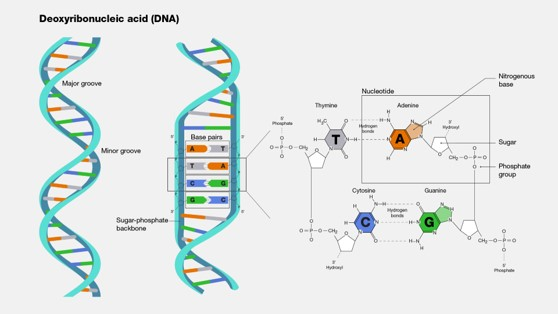

DNA is "read" by transcribing it to single stranded RNA which are fed to cell machinery called ribosomes.  RNA trades out T for U and the ribose is not missing an oxygen atom.  Ribosomes read the RNA 3 bases at a time and construct proteins by matching the trio with amino acids tied to their own RNA sequences.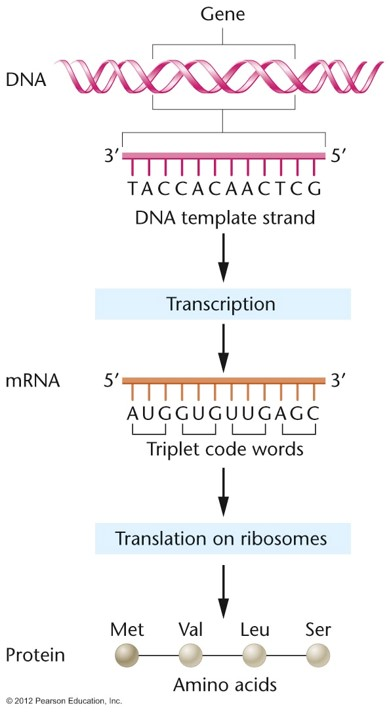

DNA base trios to their corresponding amino acids: 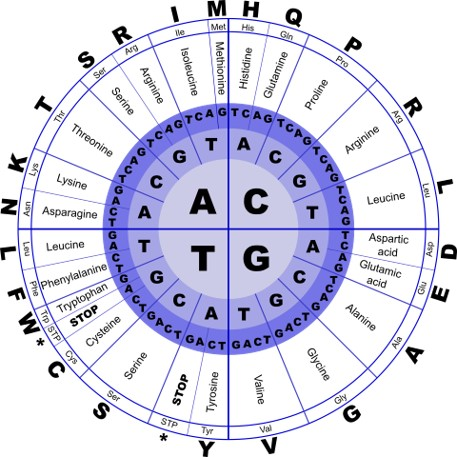

There are 64 possible base pair trios but only 20 amino acids used by humans so there is some redundancy built into the genetics system.  Base pair trios are called *codons*, both in RNA and DNA.

Damage to DNA can cause mutations which can cause changes to what proteins are produced by a gene.  Changes to proteins can cause changes to traits of a person but can also be the cause of genetic diseases. Substitutions are mutations where a single base pair is switched to another. That includes inversions where an A-T becomes a T-A pair. Substitutions can result in a single amino acid change in a protein, but because of the redundancy in the genetics system, often the substitution will do nothing.  Insertions are where one or more base pairs get inserted into the sequence and deletions are where one or more base pairs are removed from a sequence.  The consequences of insertions and deletions (indels) are reading frame shifts. This can completely change the amino acid sequence and protein length, it can introduce a new protein by creating a start codon, or it can disable a protein by deleting its start codon.  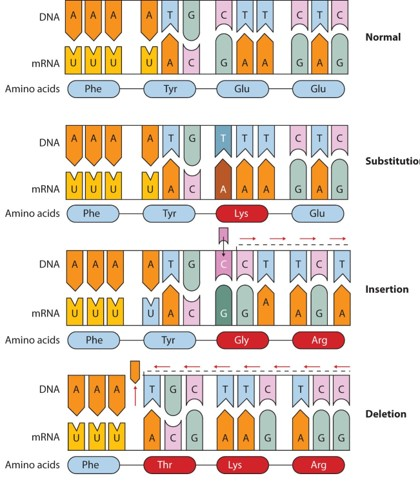

Much of a person's DNA is non-coding so the vast majority of mutations have little to no effect on a person.



## The Data
The 1000 Genomes project (https://www.internationalgenome.org/) has many genetics data sets.  I used the "1000 Genomes 30x on GRCh38" dataset which is based on the Human Genome Project's (HGP) GRCh38 build of the human genome.  GRCh38 is short for Genome Reference Consortium Human Build 38.  The 1000 Genomes 30x on GRCh38 is an annotated dataset that contains a list of variants one each chromosome.  A variant is any deviation from the sequence of a reference genome, in this case the Human Genome Project's GRCh38 build.  The reference genome sequence is 3.1 GB (gigabytes, gigabases, either one works here) of G’s, A’s, T’s, and C’s.  Annotating a whole genome would be many times more data so sequencing companies track the differences from the reference genomes and only annotate that.  Even so, the annotated variants of the 1000 Genomes 30x on GRCh38 dataset consist of 24 text files (one for each human chromosome; 01-22, X, and Y) adding up to almost 60 GB (only gigabytes in this case) of data.  In addition to the 1000 genomes data, I made a CSV from the Human Genome Project site listing how many base pairs each chromosome has for doing relative size calculations on each chromosome. (https://www.ncbi.nlm.nih.gov/assembly/GCF_000001405.40/#/st_Primary-Assembly).

## Summary of Initial Data Cleaning and Processing
Because the initial dataset was 60 GB, I had to do a considerable amount of data cleaning to make it usable.  I opted to do this initial cleaning outside of a Jupyter notebook, mainly because I don't have the Jupyter and Python Venv set up on my desktop (I do all my school work on my laptop usually because I need it to be portable) and because my desktop hardware is heavy duty for gaming and photo processing.  
To start, I used "Text File Split", a free program on the Microsoft Store, to split each chromosome's .txt file into many smaller text files with 1,000,000 lines of data each.  This allowed me to open the text files and see which columns were there and which columns I could remove.  From there, I removed the columns I did not need (see screenshot below or gene_data_cleaning.py in the github repository).  This reduced the 60 GB of data to 12 GB of data.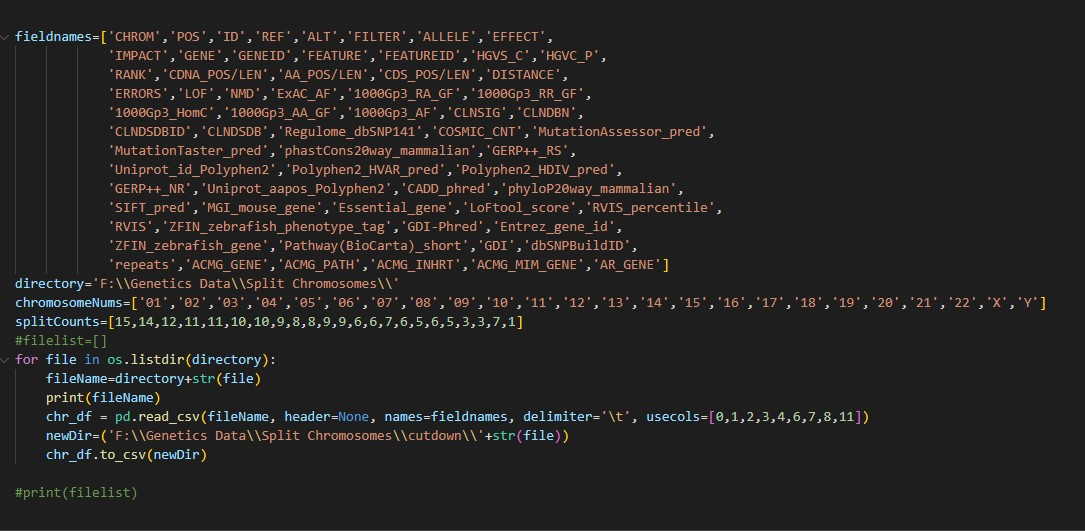


After that, I merged the separated text files back into 24 CSV files using the command line.

File merge commands in command line (NN is the chromosome number, 01-22 or X or Y): 

cd \<chromosomeNN text files directory>

copy * chrNN.csv 

From there, I loaded each chromosome csv into a dataframe and ran pd.value_counts() on each column. I combined the value counts into a nested dictionary and saved that to a pickle file.  Unfortunately the pickle file was still 3 GB so I had to drop all columns containing any GATC seqences (see screenshot below or gene_data_cleaning_2.py in the github repository).  I finally had a pickle file that was small enough (111 MB) for use in a Jupyter notebook.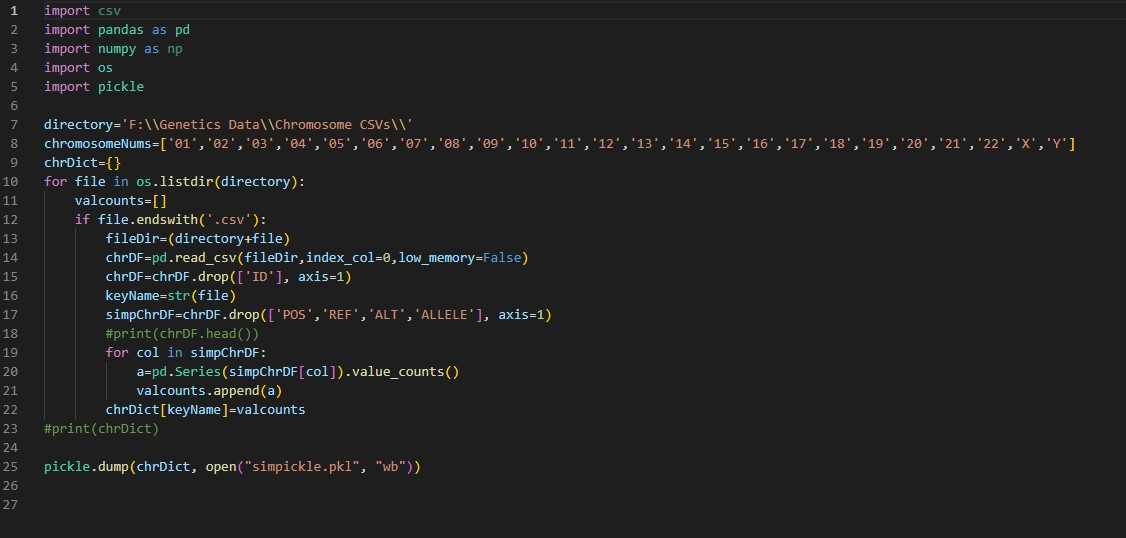

## Data Analysis
To start with, import packages and load in the pickle file, named simpickle.pkl because it is the simplified pickle file and I like portmanteaus.

In [117]:
!pip install matplotlib
!pip install wordcloud
import pandas as pd
import numpy as np
import os
import pickle
import matplotlib as mpl
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import seaborn as sns
sns.set()

You should consider upgrading via the '/mnt/c/users/imcpa/OneDrive/Documents/Data Science at DU/DSTools1/bin/python3 -m pip install --upgrade pip' command.
You should consider upgrading via the '/mnt/c/users/imcpa/OneDrive/Documents/Data Science at DU/DSTools1/bin/python3 -m pip install --upgrade pip' command.


In [118]:
pickleData = pickle.load( open( "simpickle.pkl", "rb" ) )

In [119]:
print(pickleData)

{'chr01.csv': [chr1    14053427
Name: CHROM, dtype: int64, intergenic_region                                                5349797
intron_variant                                                   5163578
downstream_gene_variant                                          1202395
upstream_gene_variant                                            1193612
intragenic_variant                                                749399
                                                                  ...   
stop_lost&disruptive_inframe_deletion                                  1
start_lost&conservative_inframe_insertion                              1
frameshift_variant&start_lost&splice_region_variant                    1
frameshift_variant&stop_gained&splice_region_variant                   1
stop_lost&splice_region_variant&conservative_inframe_deletion          1
Name: EFFECT, Length: 75, dtype: int64, MODIFIER    13903103
MODERATE       74668
LOW            57828
HIGH           17828
Name: IMPACT, 

Now we pull information from the pickle file into a dataframe.

In [120]:
#count variants, high impact variants, and variants within coding genes
varcounts=[]
highcounts=[]
geneVarCounts=[]
for i in pickleData:
    a=pickleData[i][0][0]
    b=pickleData[i][2][3]
    c=pickleData[i][3][2]
    varcounts.append(a)
    highcounts.append(b)
    geneVarCounts.append(c)

#calculate variants, high impact variants, and variants within coding genes for all chromosomes together    
d=sum(varcounts)
e=sum(highcounts)
f=sum(geneVarCounts)
varcounts2=[d]
highcounts2=[e]
geneVarCounts2=[f]

for j in varcounts:
    varcounts2.append(j)
for j in highcounts:
    highcounts2.append(j)
for j in geneVarCounts:
    geneVarCounts2.append(j)

In [121]:
totalCountsDF=pd.read_csv('Chromosome Counts.csv')
#totalCountsDF=totalCountsDF.drop(['Unnamed: 2'], axis=1)
totalCountsDF['Variant_Count']=varcounts2
totalCountsDF['Variant_Percentage']=totalCountsDF['Variant_Count']/totalCountsDF['BP_length']*100
totalCountsDF['High_Impact_Variant_Count']=highcounts2
totalCountsDF['High_Impact_Percentage']=totalCountsDF['High_Impact_Variant_Count']/totalCountsDF['BP_length']*100
totalCountsDF['Variants_In_Genes_Count']=geneVarCounts2
totalCountsDF['Variants_In_Genes_Percentage']=totalCountsDF['Variants_In_Genes_Count']/totalCountsDF['BP_length']*100

In [122]:
totalCountsDF

,Chromosome,BP_length,Variant_Count,Variant_Percentage,High_Impact_Variant_Count,High_Impact_Percentage,Variants_In_Genes_Count,Variants_In_Genes_Percentage
0,All,3099441038,174058239,5.615794,174398,0.005627,12433715,0.401160
1,1,249698942,14053427,5.628148,17828,0.007140,749428,0.300133
2,2,242508799,13961577,5.757142,14874,0.006133,1062824,0.438262
3,3,198450956,11149042,5.618034,8251,0.004158,1184227,0.596735
4,4,190424264,10591957,5.562294,6823,0.003583,757509,0.397801
5,5,181630948,10283606,5.661814,5062,0.002787,783940,0.431611
6,6,170805979,9430386,5.521110,8575,0.005020,590047,0.345449
7,7,159345973,9468709,5.942233,8730,0.005479,670150,0.420563
8,8,145138636,8614681,5.935484,10152,0.006995,727985,0.501579
9,9,138688728,7462036,5.380420,7472,0.005388,430246,0.310224


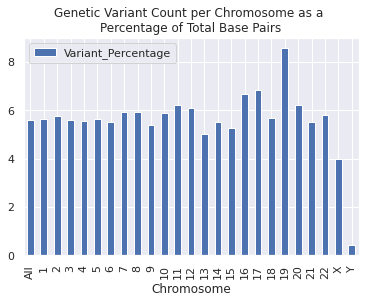

In [123]:
ax = totalCountsDF.plot.bar(x='Chromosome',y='Variant_Percentage', rot=90, title="Genetic Variant Count per Chromosome as a \nPercentage of Total Base Pairs")

Chromosome 19 has the highest percentage of variants at 8 percent while Chromosome Y has the lowest at less than 1 percent.  Most chromosomes have a variant count of about 6 percent.  Chromosome X has a noticeably low variant percentage of 4 percent.

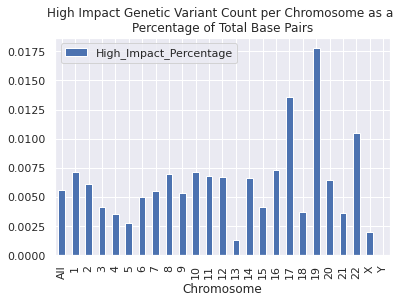

In [124]:
ax2 = totalCountsDF.plot.bar(x='Chromosome',y='High_Impact_Percentage', rot=90, title="High Impact Genetic Variant Count per Chromosome as a \nPercentage of Total Base Pairs")

Chromosome 19 has the highest proportion of high impact variants at a little over 0.0175 percent.  Most are close to either 0.0050 percent or 0.0030 percent.  Chromosome 13 has noticeably low high impact variant percent at about 0.0012 percent, lower than even the X chromosome at around 0.0020 percent.  Chromosomes 17 and 22 also have a greater proportion of high impact variants although not a great a proportion as Chromosome 19.  Chromosome Y has a nearly 0 percentage of high impact variants.

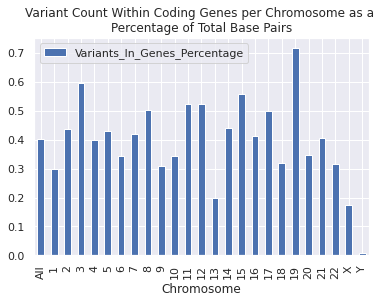

In [125]:
ax3 = totalCountsDF.plot.bar(x='Chromosome',y='Variants_In_Genes_Percentage', rot=90, title="Variant Count Within Coding Genes per Chromosome as a \nPercentage of Total Base Pairs")

Variant count within coding genes resembles the distribution of variants overall, with Chromosome 19 being the highest at about 0.7 percent and Chromosome Y being the lowest at about 0.01 percent.  Chromosome 13 has a very small proportion of variants within coding genes at 0.2 percent, just above chromosome X this time which has a proportion of variants in coding genes of about 0.18 percent.

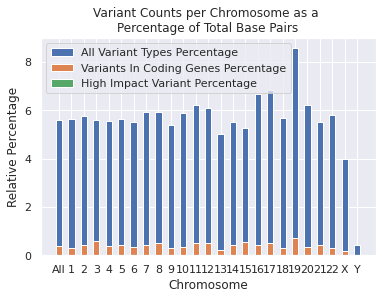

In [126]:
plt.bar(totalCountsDF['Chromosome'], totalCountsDF['Variant_Percentage'], 0.5, label = 'All Variant Types Percentage')
plt.bar(totalCountsDF['Chromosome'], totalCountsDF['Variants_In_Genes_Percentage'], 0.5, label = 'Variants In Coding Genes Percentage')
plt.bar(totalCountsDF['Chromosome'], totalCountsDF['High_Impact_Percentage'], 0.5, label = 'High Impact Variant Percentage')  

plt.xlabel("Chromosome")
plt.ylabel("Relative Percentage")
plt.title("Variant Counts per Chromosome as a \nPercentage of Total Base Pairs")
plt.legend()
plt.show()

The bar graph shows relative percentage of variant types and impact levels.  It sums them so actual numbers on the Y-axis are not valuable, but the size of the bars are.  As can be seen in the bar graph, a majority of variants occur outside of coding genes and the percentage of high impact variants is imperceptible relative to all variants and variants within coding genes.

## Conclusion
Chromosome 19 experiences the most variance of all the chromosomes, suggesting it is a good target for finding possible causes of genetic disease or predisposition to other types of diseases.  Chromosome 13 has a low proportion of high impact variants suggesting it may contain genes that if mutated could result in lethal consequences for humans or human cells.  The X and Y chromosomes experience a low proportion of variants of each type as well.  This is likely because they encode the differences between female and male humans and errors there would result in infertile humans so those variants can't be passed on to the next generation.  The Y Chromosome has an especially small proportion of variants of all types.  This is likely because the Y Chromosome is so small, there is no room for non-lethal and defertilizing variants to exist. 

According to the human genome project, 41% of human DNA is GC pairs and 59% is AT pairs.  So I made that into a word cloud.

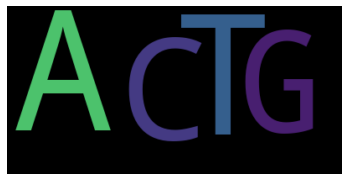

In [127]:
nbases={'A':59,'C':41,'G':41,'T':59}

wordcloud = WordCloud().generate_from_frequencies(nbases)

# Display the generated image:
# the matplotlib way:
import matplotlib.pyplot as plt
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()